<html>
<head>
<style>
    body {
        font-family: 'Arial', sans-serif;
        margin-left: 40px;
        background: #ECE9E6;  /* Color de fondo general */
        background: -webkit-linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado para Chrome */
        background: linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado estándar */
    }
    .header {
        color: #2E86C1; /* Azul oscuro */
        padding-bottom: 10px;
        font-size: 32px;
        font-weight: bold;
        border-bottom: 3px solid #2E86C1; /* Borde con el mismo color para consistencia */
    }
    .subheader {
        color: #3498DB; /* Azul un poco más claro */
        padding-top: 5px;
        font-size: 24px;
    }
    .description {
        color: #5DADE2; /* Azul aún más claro para el cuerpo de texto */
        padding: 20px 0;
        font-size: 16px;
        text-align: left;
    }
    .footer {
        color: #AED6F1; /* Azul muy claro para la fecha */
        font-size: 14px;
        padding-top: 30px;
    }
</style>
</head>
<body>

<div class="header">
    Series de Tiempo (Predicción y Caos)
</div>

<div class="subheader">
    Alumno: Rodrigo Gerardo Trejo Arriaga
</div>

<div class="description">
    <strong>Título de la Práctica:</strong> Reducción de la dimensionalidad en datos caóticos
    <br><br>
    Este trabajo se centra en la reducción de la dimensionalidad de un modelo de datos caóticos representado en R2 o R3, a un espacio vectorial de R, en el que se conserve lo más posible la propiedad del caos observado en el modelo original. Esto con el fin de alimentar al caminante aleatorio y observar su comportamiento
</div>

<div class="footer">
    Fecha de Entrega: <strong>30 de Abril, 2024</strong>
</div>

</body>
</html>


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
def leer_col_csv(file_path, column_name):
    data = pd.read_csv(file_path)
    column_data = data[column_name]
    return np.array(column_data)


def graficar(x, t, plot_type='scatter', width=15, height=10, save_as_pdf=False, titulo="Diagrama de bifurcación cúbica de Feigenbaum"):
    """
    Crea un gráfico utilizando Matplotlib con estilo personalizado y márgenes ajustados.
    """
    plt.style.use('seaborn-darkgrid')
    plt.rcParams['axes.facecolor'] = '#e9f0fb'
    plt.rcParams['grid.color'] = 'white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = 1.5
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = 'black'

    fig, ax = plt.subplots(figsize=(width*1.5, height*1.5))
    fig.subplots_adjust(left=0.15, right=1, top=0.85, bottom=0.15)

    # Crear el gráfico
    if plot_type == 'scatter':
        ax.scatter(t, x, color='blue', marker='o', s=0.1)
    elif plot_type == 'line':
        ax.plot(t, x, color='blue', linewidth=1)

    ax.set_title(titulo, fontsize=16, loc='left', pad=20, color='black')
    ax.set_xlabel('Tasa de crecimiento t', fontsize=13, labelpad=15, color='black')
    ax.set_ylabel('Valor de x', fontsize=13, labelpad=15, color='black')
    ax.tick_params(axis='both', which='major', labelsize=10)

    if save_as_pdf:
        plt.savefig(f"{titulo.replace(' ', '_')}.pdf", format='pdf', dpi=300)

    plt.show()

In [123]:
file_path = 'datosLorentz.csv' 
data = pd.read_csv(file_path)

a, b, c, d, e = 0.1, 0.2, 0.3, 0.05, 0.05
x, y, z = data['Valores x'], data['Valores y'], data['Valores z']
transformed = a*x + b*y + c*z + d*x*y + e*y*z
result_df = pd.DataFrame(data=transformed, columns=['transfLorentz'])
result_df.to_csv("transfLorentz.csv", index=False)

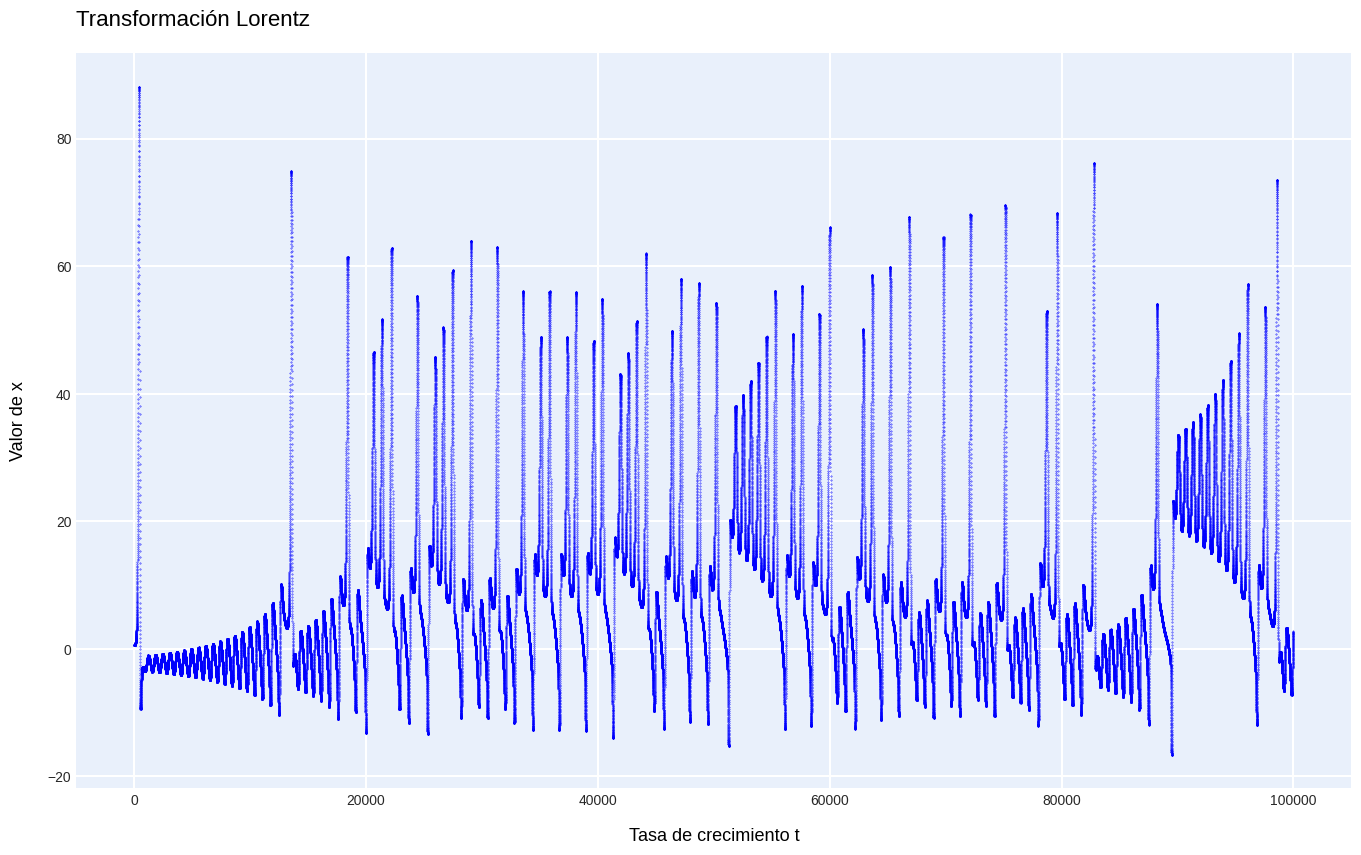

In [124]:
valores_x = leer_col_csv("transfLorentz.csv", "transfLorentz")
valores_k = range(1, len(valores_x)+1)
graficar(valores_x, valores_k, width=10, height=7 ,titulo="Transformación Lorentz", save_as_pdf=True)

In [125]:
file_path = 'datosRossler.csv'
data = pd.read_csv(file_path)

a, b, c, d, e,f = 0.1, 0.2, 0.3, 0.05, 0.05, 0.02
x, y, z = data['Valores x'], data['Valores y'], data['Valores z']
transformed = a*x + b*y + c*z + d*x*y + e*y*z + f*x*z
result_df = pd.DataFrame(data=transformed, columns=['transfRossler'])
result_df.to_csv("transfRossler.csv", index=False)


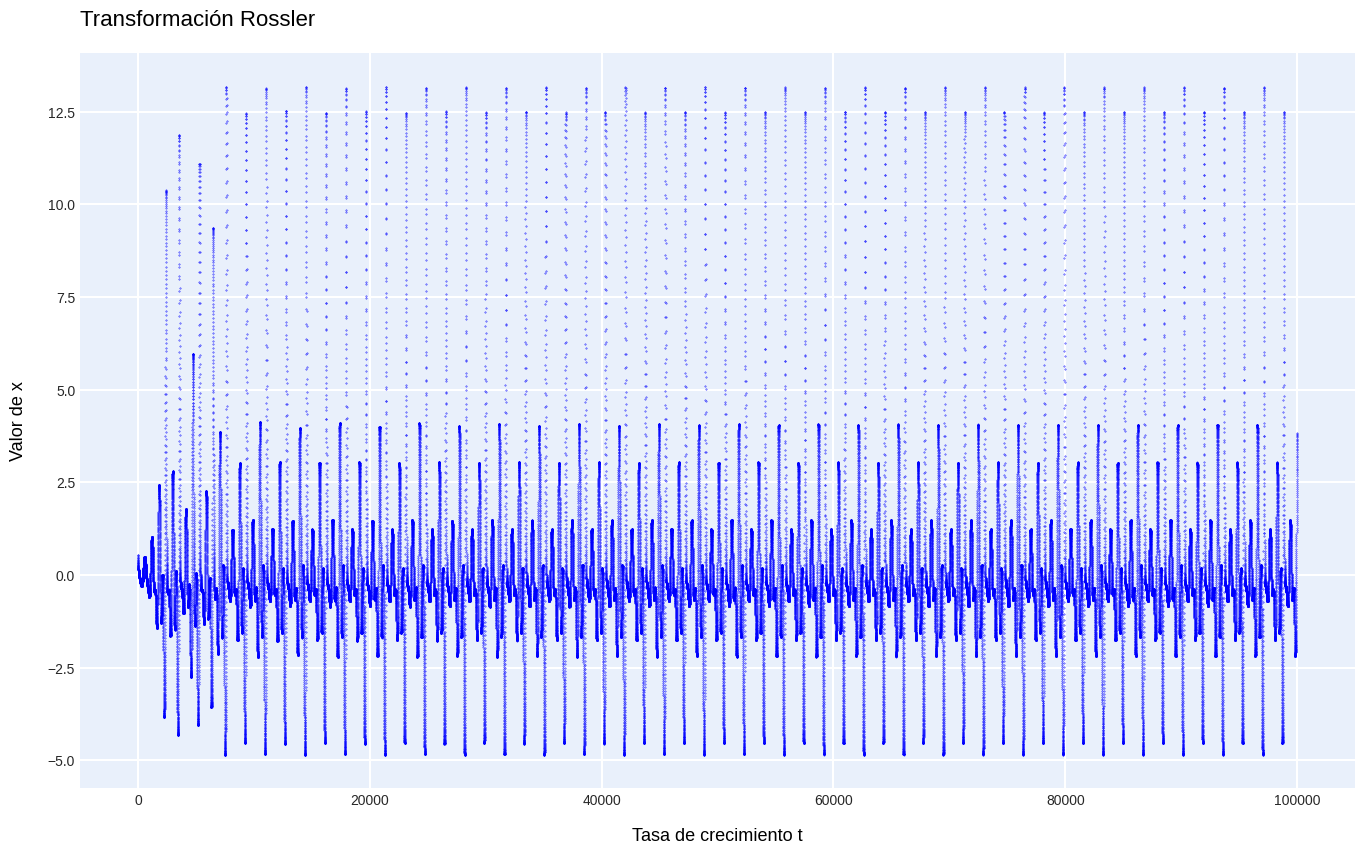

In [126]:
valores_x = leer_col_csv("transfRossler.csv", "transfRossler")
valores_k = range(1, len(valores_x)+1)
graficar(valores_x, valores_k, width=10, height=7 ,titulo="Transformación Rossler", save_as_pdf=True)

In [127]:
file_path = 'datosHenon.csv'
data = pd.read_csv(file_path)

x, y = data['Valores x'], data['Valores y']
transformed = a*x + b*y + d*x*y
result_df = pd.DataFrame(data=transformed, columns=['transfHenon'])
result_df.to_csv("transfHenon.csv", index=False)


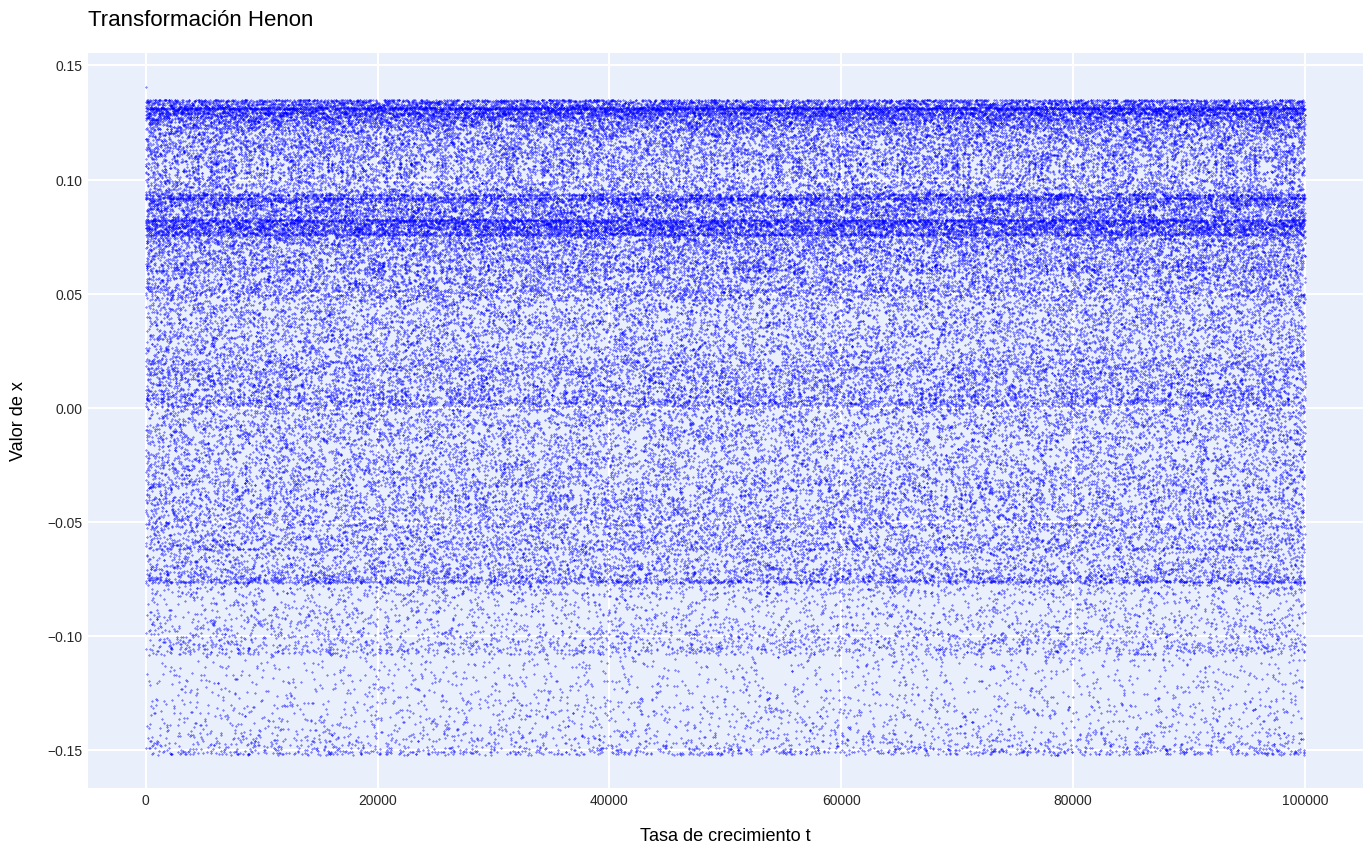

In [128]:
valores_x = leer_col_csv("transfHenon.csv", "transfHenon")
valores_k = range(1, len(valores_x)+1)
graficar(valores_x, valores_k, width=10, height=7 ,titulo="Transformación Henon", save_as_pdf=True)